## Import modules

In [1]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc
import scvi

Global seed set to 0


In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

## Run scVI for all subsets

In [4]:
compartments={
    'aCM':['Atrial Cardiomyocyte'],
    'vCM':['Ventricular Cardiomyocyte'],
    'EC':['Endothelial cell'],
    'LEC':['Lymphatic Endothelial cell'],
    'Mural':['Mural cell'],
    'Meso':['Mesothelial cell'],
    'FB':['Fibroblast'],
    'Adip':['Adipocyte'], 
    'NC':['Neuronal cell'], 
    'Myelo':['Myeloid'], 
    'Lymph':['Lymphoid'],
    'Mast':['Mast cell'],
}

##### aCM #####
(40543, 28086)
[  1. 116.  46. 151. 142. 304. 170. 237. 562. 102.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 40543 cells, 28086 vars, 25       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 40543 │
│             Vars             │ 28086 │
│            Labels            │   1   │
│           Batches            │  25   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │   D4_Cell_3prime-v2    │          6          │
│                        │  D4_Nuclei_3prime-v2   │          7          │
│                        │   D5_Cell_3prime-v2    │          8          │
│                        │  D5_Nuclei_3prime-v2   │          9          │
│                        │   D6_Cell_3prime-v2    │         10          │
│                        │   D6_Cell_3prime-v3    │         11          │
│                        │  D6_Nuclei_3prime-v2   │         12          │
│                        │   D7_Cell_3prime-v2    │         13          │
│                        │  D7_Nuclei_3prime-v2   │         14          │
│                        │ D7_Nuclei_Multiome-v1  │         15          │
│                        │ D8_Nuclei_Multiome-v1  │         16          │
│                        │   D11_Cell_3prime-v3   │         17          │
│                        │  D11_Nuclei_3prime-v3  │         18          │
│                        │  H2_Nuclei_3prime-v3   │         19          │
│                        │  H3_Nuclei_3prime-v3   │         20          │
│                        │  H4_Nuclei_3prime-v3   │         21          │
│                        │  H5_Nuclei_3prime-v3   │         22          │
│                        │  H6_Nuclei_3prime-v3   │         23          │
│                        │  H7_Nuclei_3prime-v3   │         24          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 169833        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.984140396118164062 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 14.23290252685546875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 197/197: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [17:23<00:00,  5.30s/it, loss=6.26e+03, v_num=1]


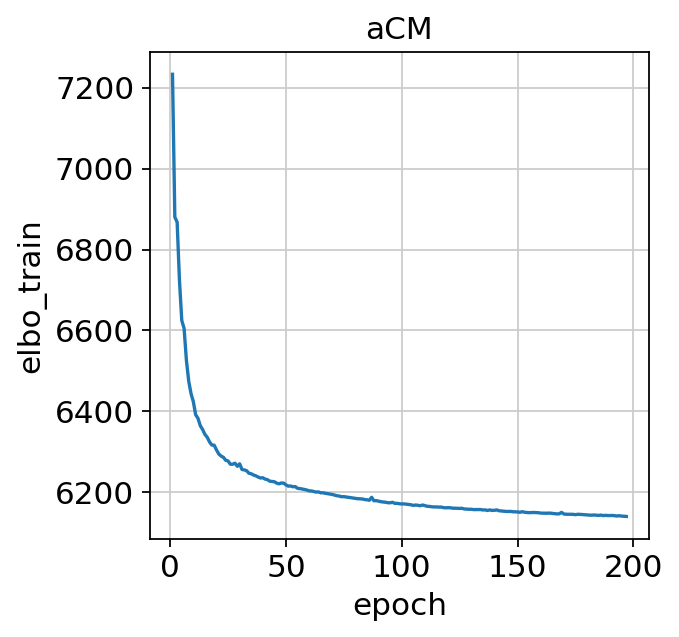

##### vCM #####
(186428, 29427)
[8. 2. 1. 1. 1. 3. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 186428 cells, 29427 vars, 26      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃             Data             ┃ Count  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│            Cells             │ 186428 │
│             Vars             │ 29427  │
│            Labels            │   1    │
│           Batches            │   26   │
│           Proteins           │   0    │
│ Extra Categorical Covariates │   0    │
│ Extra Continuous Covariates  │   3    │
└──────────────────────────────┴────────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │ D3_Nuclei_Multiome-v1  │          6          │
│                        │   D4_Cell_3prime-v2    │          7          │
│                        │  D4_Nuclei_3prime-v2   │          8          │
│                        │   D5_Cell_3prime-v2    │          9          │
│                        │  D5_Nuclei_3prime-v2   │         10          │
│                        │   D6_Cell_3prime-v2    │         11          │
│                        │   D6_Cell_3prime-v3    │         12          │
│                        │  D6_Nuclei_3prime-v2   │         13          │
│                        │   D7_Cell_3prime-v2    │         14          │
│                        │  D7_Nuclei_3prime-v2   │         15          │
│                        │ D7_Nuclei_Multiome-v1  │         16          │
│                        │ D8_Nuclei_Multiome-v1  │         17          │
│                        │   D11_Cell_3prime-v3   │         18          │
│                        │  D11_Nuclei_3prime-v3  │         19          │
│                        │  H2_Nuclei_3prime-v3   │         20          │
│                        │  H3_Nuclei_3prime-v3   │         21          │
│                        │  H4_Nuclei_3prime-v3   │         22          │
│                        │  H5_Nuclei_3prime-v3   │         23          │
│                        │  H6_Nuclei_3prime-v3   │         24          │
│                        │  H7_Nuclei_3prime-v3   │         25          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 135475        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.994157791137695312 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 18.918918609619140625 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 43/43: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [18:37<00:00, 25.98s/it, loss=5.71e+03, v_num=1]


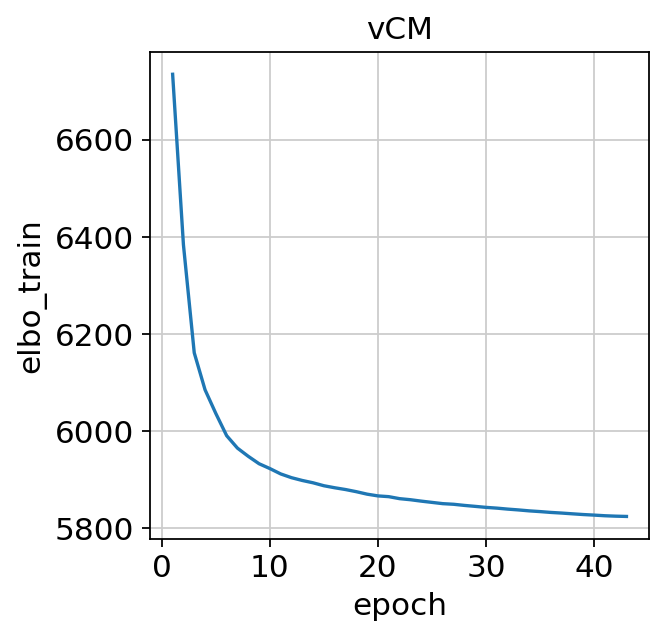

##### EC #####
(122741, 28046)
[1. 1. 1. 1. 2. 1. 1. 1. 5. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 122741 cells, 28046 vars, 27      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃             Data             ┃ Count  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│            Cells             │ 122741 │
│             Vars             │ 28046  │
│            Labels            │   1    │
│           Batches            │   27   │
│           Proteins           │   0    │
│ Extra Categorical Covariates │   0    │
│ Extra Continuous Covariates  │   3    │
└──────────────────────────────┴────────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │   D1_Cell_3prime-v2    │          2          │
│                        │  D1_Nuclei_3prime-v2   │          3          │
│                        │  D2_Nuclei_3prime-v2   │          4          │
│                        │   D3_Cell_3prime-v2    │          5          │
│                        │  D3_Nuclei_3prime-v2   │          6          │
│                        │ D3_Nuclei_Multiome-v1  │          7          │
│                        │   D4_Cell_3prime-v2    │          8          │
│                        │  D4_Nuclei_3prime-v2   │          9          │
│                        │   D5_Cell_3prime-v2    │         10          │
│                        │  D5_Nuclei_3prime-v2   │         11          │
│                        │   D6_Cell_3prime-v2    │         12          │
│                        │   D6_Cell_3prime-v3    │         13          │
│                        │  D6_Nuclei_3prime-v2   │         14          │
│                        │   D7_Cell_3prime-v2    │         15          │
│                        │  D7_Nuclei_3prime-v2   │         16          │
│                        │ D7_Nuclei_Multiome-v1  │         17          │
│                        │ D8_Nuclei_Multiome-v1  │         18          │
│                        │   D11_Cell_3prime-v3   │         19          │
│                        │  D11_Nuclei_3prime-v3  │         20          │
│                        │  H2_Nuclei_3prime-v3   │         21          │
│                        │  H3_Nuclei_3prime-v3   │         22          │
│                        │  H4_Nuclei_3prime-v3   │         23          │
│                        │  H5_Nuclei_3prime-v3   │         24          │
│                        │  H6_Nuclei_3prime-v3   │         25          │
│                        │  H7_Nuclei_3prime-v3   │         26          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 170009        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.998819351196289062 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.460317611694335938 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 65/65: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [16:58<00:00, 15.67s/it, loss=3.6e+03, v_num=1]


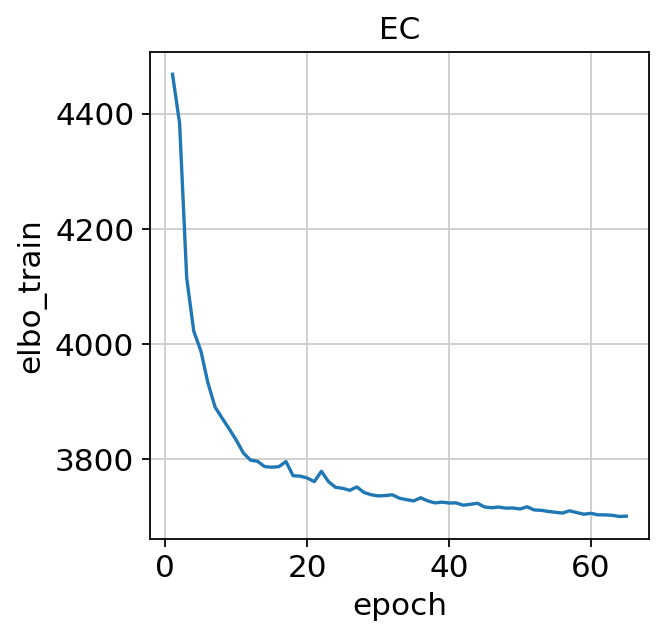

##### LEC #####
(984, 17469)
[1. 2. 1. 1. 1. 3. 7. 3. 1. 3.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 984 cells, 17469 vars, 25 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 3 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 4 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │  984  │
│             Vars             │ 17469 │
│            Labels            │   1   │
│           Batches            │  25   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │   D4_Cell_3prime-v2    │          6          │
│                        │  D4_Nuclei_3prime-v2   │          7          │
│                        │   D5_Cell_3prime-v2    │          8          │
│                        │  D5_Nuclei_3prime-v2   │          9          │
│                        │   D6_Cell_3prime-v2    │         10          │
│                        │   D6_Cell_3prime-v3    │         11          │
│                        │  D6_Nuclei_3prime-v2   │         12          │
│                        │   D7_Cell_3prime-v2    │         13          │
│                        │  D7_Nuclei_3prime-v2   │         14          │
│                        │ D7_Nuclei_Multiome-v1  │         15          │
│                        │ D8_Nuclei_Multiome-v1  │         16          │
│                        │   D11_Cell_3prime-v3   │         17          │
│                        │  D11_Nuclei_3prime-v3  │         18          │
│                        │  H2_Nuclei_3prime-v3   │         19          │
│                        │  H3_Nuclei_3prime-v3   │         20          │
│                        │  H4_Nuclei_3prime-v3   │         21          │
│                        │  H5_Nuclei_3prime-v3   │         22          │
│                        │  H6_Nuclei_3prime-v3   │         23          │
│                        │  H7_Nuclei_3prime-v3   │         24          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        501 -> 51366        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.967706680297851562 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 13.403220176696777344 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:54<00:00,  7.32it/s, loss=4.22e+03, v_num=1]


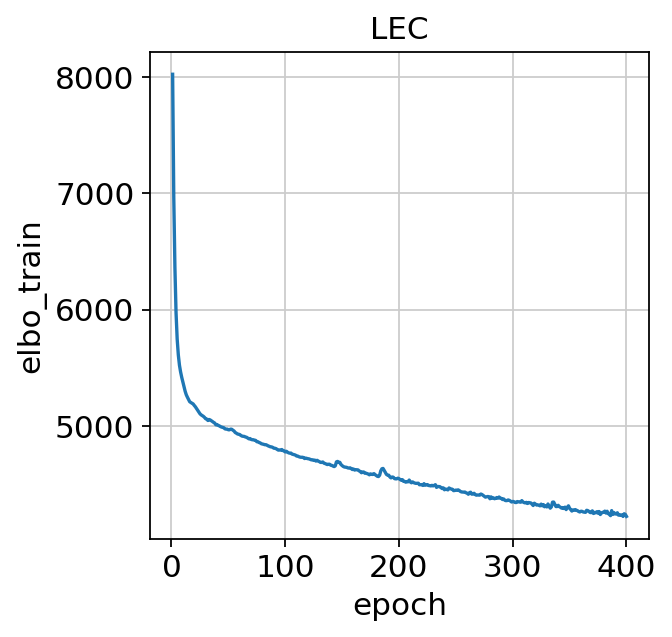

##### Mural #####
(99845, 27753)
[1. 2. 3. 2. 8. 2. 1. 1. 2. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 99845 cells, 27753 vars, 27       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 99845 │
│             Vars             │ 27753 │
│            Labels            │   1   │
│           Batches            │  27   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │   D1_Cell_3prime-v2    │          2          │
│                        │  D1_Nuclei_3prime-v2   │          3          │
│                        │  D2_Nuclei_3prime-v2   │          4          │
│                        │   D3_Cell_3prime-v2    │          5          │
│                        │  D3_Nuclei_3prime-v2   │          6          │
│                        │ D3_Nuclei_Multiome-v1  │          7          │
│                        │   D4_Cell_3prime-v2    │          8          │
│                        │  D4_Nuclei_3prime-v2   │          9          │
│                        │   D5_Cell_3prime-v2    │         10          │
│                        │  D5_Nuclei_3prime-v2   │         11          │
│                        │   D6_Cell_3prime-v2    │         12          │
│                        │   D6_Cell_3prime-v3    │         13          │
│                        │  D6_Nuclei_3prime-v2   │         14          │
│                        │   D7_Cell_3prime-v2    │         15          │
│                        │  D7_Nuclei_3prime-v2   │         16          │
│                        │ D7_Nuclei_Multiome-v1  │         17          │
│                        │ D8_Nuclei_Multiome-v1  │         18          │
│                        │   D11_Cell_3prime-v3   │         19          │
│                        │  D11_Nuclei_3prime-v3  │         20          │
│                        │  H2_Nuclei_3prime-v3   │         21          │
│                        │  H3_Nuclei_3prime-v3   │         22          │
│                        │  H4_Nuclei_3prime-v3   │         23          │
│                        │  H5_Nuclei_3prime-v3   │         24          │
│                        │  H6_Nuclei_3prime-v3   │         25          │
│                        │  H7_Nuclei_3prime-v3   │         26          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 94519        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.991670608520507812 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.515668869018554688 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 80/80: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [17:04<00:00, 12.81s/it, loss=3.1e+03, v_num=1]


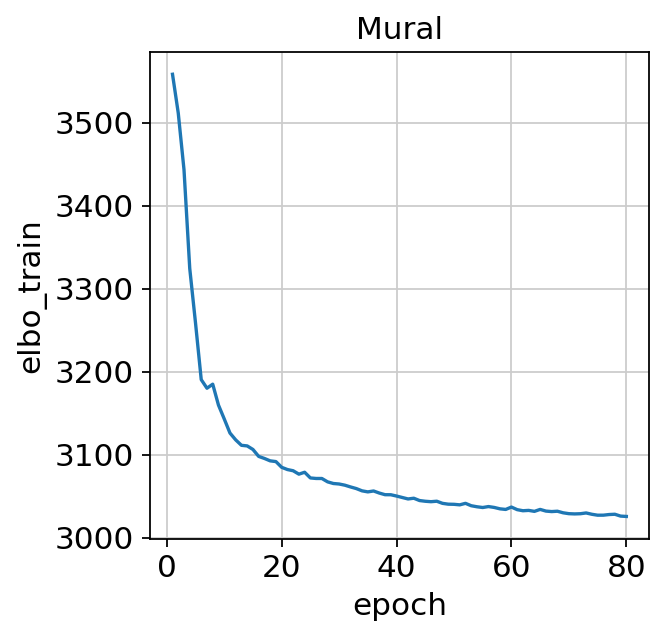

##### Meso #####
(896, 17736)
[  1. 241.   1.  24. 418.   1.  76. 434. 281. 607.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 896 cells, 17736 vars, 21 batches,
         1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 3 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 0 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │  896  │
│             Vars             │ 17736 │
│            Labels            │   1   │
│           Batches            │  21   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D2_Nuclei_3prime-v2   │          2          │
│                        │   D3_Cell_3prime-v2    │          3          │
│                        │  D3_Nuclei_3prime-v2   │          4          │
│                        │   D4_Cell_3prime-v2    │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │   D5_Cell_3prime-v2    │          7          │
│                        │  D5_Nuclei_3prime-v2   │          8          │
│                        │   D6_Cell_3prime-v2    │          9          │
│                        │   D6_Cell_3prime-v3    │         10          │
│                        │  D6_Nuclei_3prime-v2   │         11          │
│                        │   D7_Cell_3prime-v2    │         12          │
│                        │  D7_Nuclei_3prime-v2   │         13          │
│                        │ D7_Nuclei_Multiome-v1  │         14          │
│                        │ D8_Nuclei_Multiome-v1  │         15          │
│                        │   D11_Cell_3prime-v3   │         16          │
│                        │  H2_Nuclei_3prime-v3   │         17          │
│                        │  H5_Nuclei_3prime-v3   │         18          │
│                        │  H6_Nuclei_3prime-v3   │         19          │
│                        │  H7_Nuclei_3prime-v3   │         20          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 113373        │
│  adata.obs['pct_counts_mt']  │ 0 -> 18.316852569580078125 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.148937225341796875 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:51<00:00,  7.80it/s, loss=4.09e+03, v_num=1]


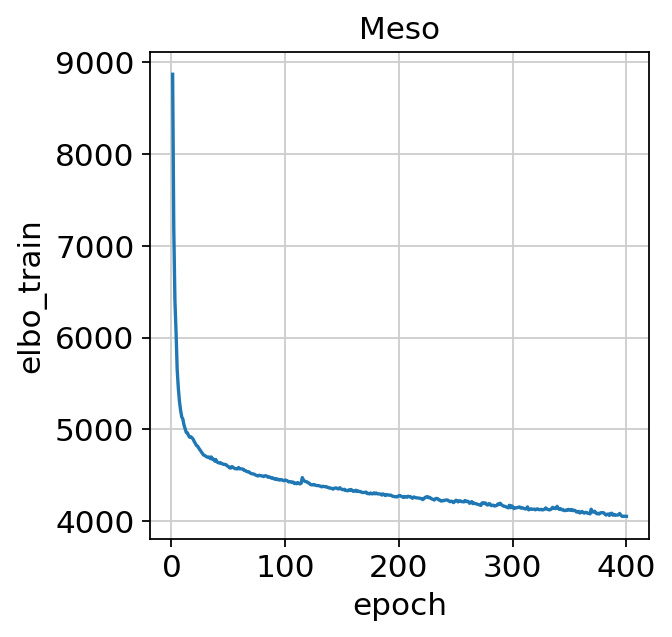

##### FB #####
(106672, 29061)
[2. 2. 1. 1. 1. 1. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 106672 cells, 29061 vars, 27      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃             Data             ┃ Count  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│            Cells             │ 106672 │
│             Vars             │ 29061  │
│            Labels            │   1    │
│           Batches            │   27   │
│           Proteins           │   0    │
│ Extra Categorical Covariates │   0    │
│ Extra Continuous Covariates  │   3    │
└──────────────────────────────┴────────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │   D1_Cell_3prime-v2    │          2          │
│                        │  D1_Nuclei_3prime-v2   │          3          │
│                        │  D2_Nuclei_3prime-v2   │          4          │
│                        │   D3_Cell_3prime-v2    │          5          │
│                        │  D3_Nuclei_3prime-v2   │          6          │
│                        │ D3_Nuclei_Multiome-v1  │          7          │
│                        │   D4_Cell_3prime-v2    │          8          │
│                        │  D4_Nuclei_3prime-v2   │          9          │
│                        │   D5_Cell_3prime-v2    │         10          │
│                        │  D5_Nuclei_3prime-v2   │         11          │
│                        │   D6_Cell_3prime-v2    │         12          │
│                        │   D6_Cell_3prime-v3    │         13          │
│                        │  D6_Nuclei_3prime-v2   │         14          │
│                        │   D7_Cell_3prime-v2    │         15          │
│                        │  D7_Nuclei_3prime-v2   │         16          │
│                        │ D7_Nuclei_Multiome-v1  │         17          │
│                        │ D8_Nuclei_Multiome-v1  │         18          │
│                        │   D11_Cell_3prime-v3   │         19          │
│                        │  D11_Nuclei_3prime-v3  │         20          │
│                        │  H2_Nuclei_3prime-v3   │         21          │
│                        │  H3_Nuclei_3prime-v3   │         22          │
│                        │  H4_Nuclei_3prime-v3   │         23          │
│                        │  H5_Nuclei_3prime-v3   │         24          │
│                        │  H6_Nuclei_3prime-v3   │         25          │
│                        │  H7_Nuclei_3prime-v3   │         26          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 256288        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.942508697509765625 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 18.827161788940429688 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 75/75: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [17:43<00:00, 14.17s/it, loss=4.13e+03, v_num=1]


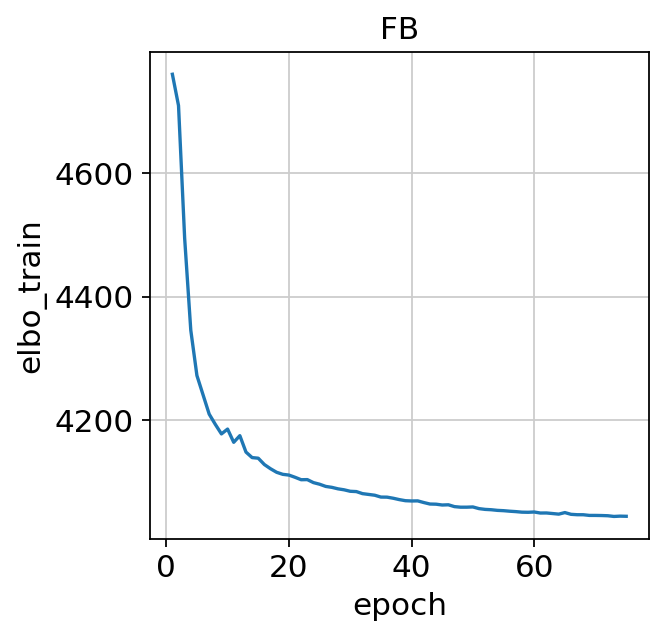

##### Adip #####
(5166, 25655)
[16.  6. 28. 26. 31. 43. 20. 38.  5. 23.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 12 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key


INFO     Successfully registered anndata object containing 5166 cells, 25655 vars, 20        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 5166  │
│             Vars             │ 25655 │
│            Labels            │   1   │
│           Batches            │  20   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │  D3_Nuclei_3prime-v2   │          4          │
│                        │ D3_Nuclei_Multiome-v1  │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │  D5_Nuclei_3prime-v2   │          7          │
│                        │  D6_Nuclei_3prime-v2   │          8          │
│                        │  D7_Nuclei_3prime-v2   │          9          │
│                        │ D7_Nuclei_Multiome-v1  │         10          │
│                        │ D8_Nuclei_Multiome-v1  │         11          │
│                        │   D11_Cell_3prime-v3   │         12          │
│                        │  D11_Nuclei_3prime-v3  │         13          │
│                        │  H2_Nuclei_3prime-v3   │         14          │
│                        │  H3_Nuclei_3prime-v3   │         15          │
│                        │  H4_Nuclei_3prime-v3   │         16          │
│                        │  H5_Nuclei_3prime-v3   │         17          │
│                        │  H6_Nuclei_3prime-v3   │         18          │
│                        │  H7_Nuclei_3prime-v3   │         19          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 93335        │
│  adata.obs['pct_counts_mt']  │ 0 -> 13.378684043884277344 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 4.7619047164916992188 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [04:41<00:00,  1.42it/s, loss=7.1e+03, v_num=1]


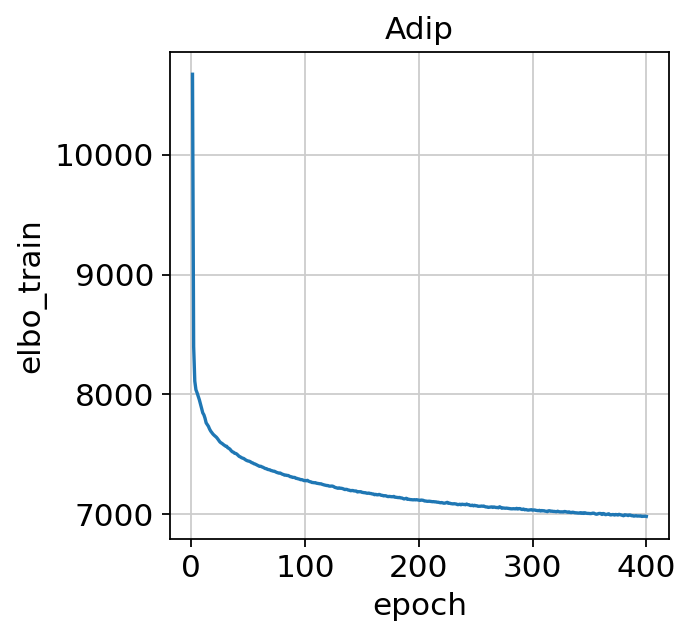

##### NC #####
(5625, 23682)
[8. 1. 2. 1. 2. 1. 1. 1. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 5625 cells, 23682 vars, 26        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 5625  │
│             Vars             │ 23682 │
│            Labels            │   1   │
│           Batches            │  26   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │ D3_Nuclei_Multiome-v1  │          6          │
│                        │   D4_Cell_3prime-v2    │          7          │
│                        │  D4_Nuclei_3prime-v2   │          8          │
│                        │   D5_Cell_3prime-v2    │          9          │
│                        │  D5_Nuclei_3prime-v2   │         10          │
│                        │   D6_Cell_3prime-v2    │         11          │
│                        │   D6_Cell_3prime-v3    │         12          │
│                        │  D6_Nuclei_3prime-v2   │         13          │
│                        │   D7_Cell_3prime-v2    │         14          │
│                        │  D7_Nuclei_3prime-v2   │         15          │
│                        │ D7_Nuclei_Multiome-v1  │         16          │
│                        │ D8_Nuclei_Multiome-v1  │         17          │
│                        │   D11_Cell_3prime-v3   │         18          │
│                        │  D11_Nuclei_3prime-v3  │         19          │
│                        │  H2_Nuclei_3prime-v3   │         20          │
│                        │  H3_Nuclei_3prime-v3   │         21          │
│                        │  H4_Nuclei_3prime-v3   │         22          │
│                        │  H5_Nuclei_3prime-v3   │         23          │
│                        │  H6_Nuclei_3prime-v3   │         24          │
│                        │  H7_Nuclei_3prime-v3   │         25          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 205951        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.613582611083984375 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 11.123659133911132812 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [04:28<00:00,  1.49it/s, loss=3.63e+03, v_num=1]


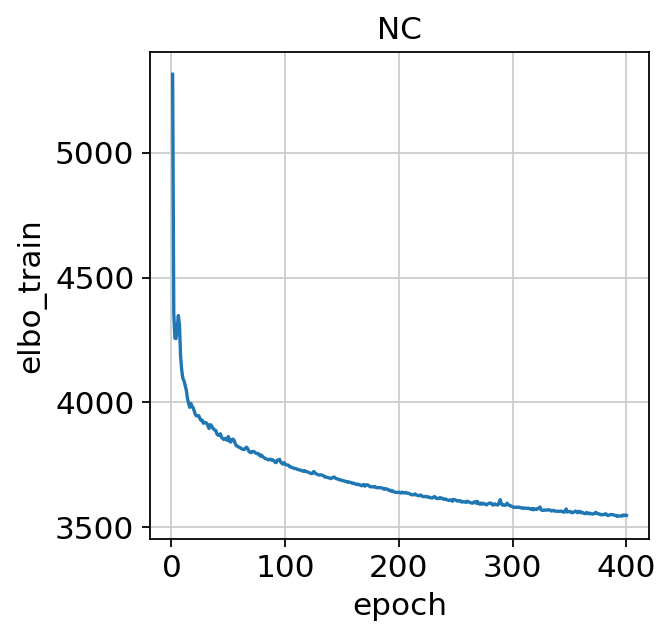

##### Myelo #####
(37439, 27138)
[1. 8. 1. 1. 1. 2. 1. 1. 2. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 37439 cells, 27138 vars, 27       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 37439 │
│             Vars             │ 27138 │
│            Labels            │   1   │
│           Batches            │  27   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │   D1_Cell_3prime-v2    │          2          │
│                        │  D1_Nuclei_3prime-v2   │          3          │
│                        │  D2_Nuclei_3prime-v2   │          4          │
│                        │   D3_Cell_3prime-v2    │          5          │
│                        │  D3_Nuclei_3prime-v2   │          6          │
│                        │ D3_Nuclei_Multiome-v1  │          7          │
│                        │   D4_Cell_3prime-v2    │          8          │
│                        │  D4_Nuclei_3prime-v2   │          9          │
│                        │   D5_Cell_3prime-v2    │         10          │
│                        │  D5_Nuclei_3prime-v2   │         11          │
│                        │   D6_Cell_3prime-v2    │         12          │
│                        │   D6_Cell_3prime-v3    │         13          │
│                        │  D6_Nuclei_3prime-v2   │         14          │
│                        │   D7_Cell_3prime-v2    │         15          │
│                        │  D7_Nuclei_3prime-v2   │         16          │
│                        │ D7_Nuclei_Multiome-v1  │         17          │
│                        │ D8_Nuclei_Multiome-v1  │         18          │
│                        │   D11_Cell_3prime-v3   │         19          │
│                        │  D11_Nuclei_3prime-v3  │         20          │
│                        │  H2_Nuclei_3prime-v3   │         21          │
│                        │  H3_Nuclei_3prime-v3   │         22          │
│                        │  H4_Nuclei_3prime-v3   │         23          │
│                        │  H5_Nuclei_3prime-v3   │         24          │
│                        │  H6_Nuclei_3prime-v3   │         25          │
│                        │  H7_Nuclei_3prime-v3   │         26          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 112812        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.993595123291015625 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.693302154541015625 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 214/214: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [16:48<00:00,  4.71s/it, loss=4.2e+03, v_num=1]


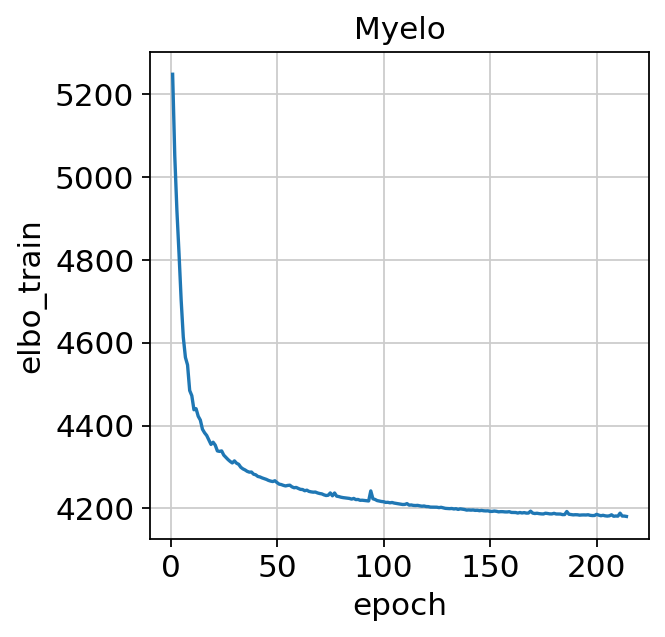

##### Lymph #####
(21178, 24518)
[1. 1. 1. 2. 1. 1. 1. 2. 1. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 21178 cells, 24518 vars, 26       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 21178 │
│             Vars             │ 24518 │
│            Labels            │   1   │
│           Batches            │  26   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │ D3_Nuclei_Multiome-v1  │          6          │
│                        │   D4_Cell_3prime-v2    │          7          │
│                        │  D4_Nuclei_3prime-v2   │          8          │
│                        │   D5_Cell_3prime-v2    │          9          │
│                        │  D5_Nuclei_3prime-v2   │         10          │
│                        │   D6_Cell_3prime-v2    │         11          │
│                        │   D6_Cell_3prime-v3    │         12          │
│                        │  D6_Nuclei_3prime-v2   │         13          │
│                        │   D7_Cell_3prime-v2    │         14          │
│                        │  D7_Nuclei_3prime-v2   │         15          │
│                        │ D7_Nuclei_Multiome-v1  │         16          │
│                        │ D8_Nuclei_Multiome-v1  │         17          │
│                        │   D11_Cell_3prime-v3   │         18          │
│                        │  D11_Nuclei_3prime-v3  │         19          │
│                        │  H2_Nuclei_3prime-v3   │         20          │
│                        │  H3_Nuclei_3prime-v3   │         21          │
│                        │  H4_Nuclei_3prime-v3   │         22          │
│                        │  H5_Nuclei_3prime-v3   │         23          │
│                        │  H6_Nuclei_3prime-v3   │         24          │
│                        │  H7_Nuclei_3prime-v3   │         25          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 83718        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.987506866455078125 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.996891021728515625 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 378/378: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 378/378 [15:31<00:00,  2.46s/it, loss=2.91e+03, v_num=1]


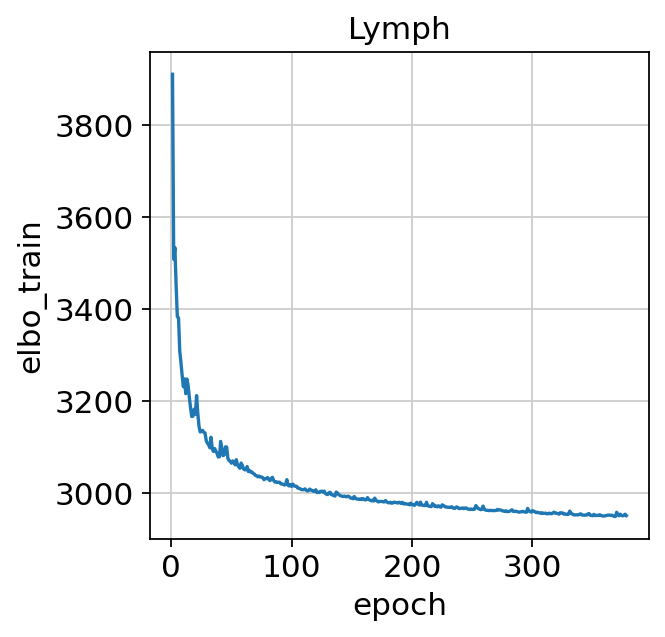

##### Mast #####
(1524, 16407)
[1. 1. 1. 1. 1. 4. 1. 1. 2. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 1524 cells, 16407 vars, 19        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/scvi/data/_anndata.py:745: UserWarning: Category 8 in adata.obs['_scvi_batch'] has fewer than 3 cells. SCVI may not train properly.
  category, alternate_column_key
/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 1524  │
│             Vars             │ 16407 │
│            Labels            │   1   │
│           Batches            │  19   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │  D3_Nuclei_3prime-v2   │          4          │
│                        │ D3_Nuclei_Multiome-v1  │          5          │
│                        │  D4_Nuclei_3prime-v2   │          6          │
│                        │  D5_Nuclei_3prime-v2   │          7          │
│                        │   D6_Cell_3prime-v3    │          8          │
│                        │  D6_Nuclei_3prime-v2   │          9          │
│                        │ D7_Nuclei_Multiome-v1  │         10          │
│                        │ D8_Nuclei_Multiome-v1  │         11          │
│                        │  D11_Nuclei_3prime-v3  │         12          │
│                        │  H2_Nuclei_3prime-v3   │         13          │
│                        │  H3_Nuclei_3prime-v3   │         14          │
│                        │  H4_Nuclei_3prime-v3   │         15          │
│                        │  H5_Nuclei_3prime-v3   │         16          │
│                        │  H6_Nuclei_3prime-v3   │         17          │
│                        │  H7_Nuclei_3prime-v3   │         18          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │        500 -> 7565         │
│  adata.obs['pct_counts_mt']  │ 0 -> 4.9475264549255371094 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 3.9669420719146728516 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [01:02<00:00,  6.43it/s, loss=2.02e+03, v_num=1]


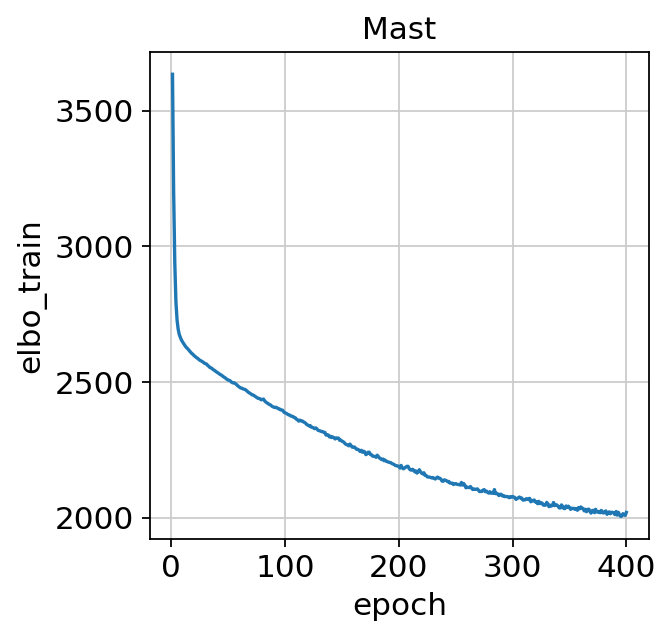

CPU times: user 10h 14s, sys: 5min 57s, total: 10h 6min 11s
Wall time: 2h 23min 8s


<Figure size 320x320 with 0 Axes>

In [5]:
%%time

for sub in compartments.keys():
    print(f'##### {sub} #####')
    
    adata = sc.read_h5ad(f'/nfs/team205/heart/anndata_objects/8regions/scVI/subsets/{sub}_pp_allgene.h5ad')
    print(adata.shape)
    print(adata.X.data[:10])
    
    # setup anndata for scVI
    scvi.model.SCVI.setup_anndata(adata, 
                              # layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])
    scvi.data.view_anndata_setup(adata)
    
    # Creating and training a model
    vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
    
    # train
    vae.train()
    
    # save scvi model
    vae.save(f'/nfs/team205/heart/anndata_objects/8regions/scVI/models/{sub}_allgene/',overwrite=True)
    
    # Convergence plot
    x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
    plt.plot(x, vae.history['elbo_train'], label="train")
    plt.title(sub)
    plt.xlabel('epoch')
    plt.ylabel('elbo_train')
    plt.show()
    plt.clf()
    
    # add the latent space to adata
    adata.obsm["X_scVI"] = vae.get_latent_representation()
    
    # store the normalized expression values in the anndata
    adata.layers["scvi_normalized"] = vae.get_normalized_expression(library_size=10e4)
    
    # save post-scVI data
    adata.write(f'/nfs/team205/heart/anndata_objects/8regions/scVI/subsets/{sub}_post-scVI.h5ad')
    
    del adata, vae

## Default structure

##### aCM #####
(40543, 28086)
[  1. 116.  46. 151. 142. 304. 170. 237. 562. 102.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 40543 cells, 28086 vars, 25       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 40543 │
│             Vars             │ 28086 │
│            Labels            │   1   │
│           Batches            │  25   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │   D4_Cell_3prime-v2    │          6          │
│                        │  D4_Nuclei_3prime-v2   │          7          │
│                        │   D5_Cell_3prime-v2    │          8          │
│                        │  D5_Nuclei_3prime-v2   │          9          │
│                        │   D6_Cell_3prime-v2    │         10          │
│                        │   D6_Cell_3prime-v3    │         11          │
│                        │  D6_Nuclei_3prime-v2   │         12          │
│                        │   D7_Cell_3prime-v2    │         13          │
│                        │  D7_Nuclei_3prime-v2   │         14          │
│                        │ D7_Nuclei_Multiome-v1  │         15          │
│                        │ D8_Nuclei_Multiome-v1  │         16          │
│                        │   D11_Cell_3prime-v3   │         17          │
│                        │  D11_Nuclei_3prime-v3  │         18          │
│                        │  H2_Nuclei_3prime-v3   │         19          │
│                        │  H3_Nuclei_3prime-v3   │         20          │
│                        │  H4_Nuclei_3prime-v3   │         21          │
│                        │  H5_Nuclei_3prime-v3   │         22          │
│                        │  H6_Nuclei_3prime-v3   │         23          │
│                        │  H7_Nuclei_3prime-v3   │         24          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 169833        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.984140396118164062 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 14.23290252685546875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 197/197: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [16:42<00:00,  5.09s/it, loss=6.14e+03, v_num=1]


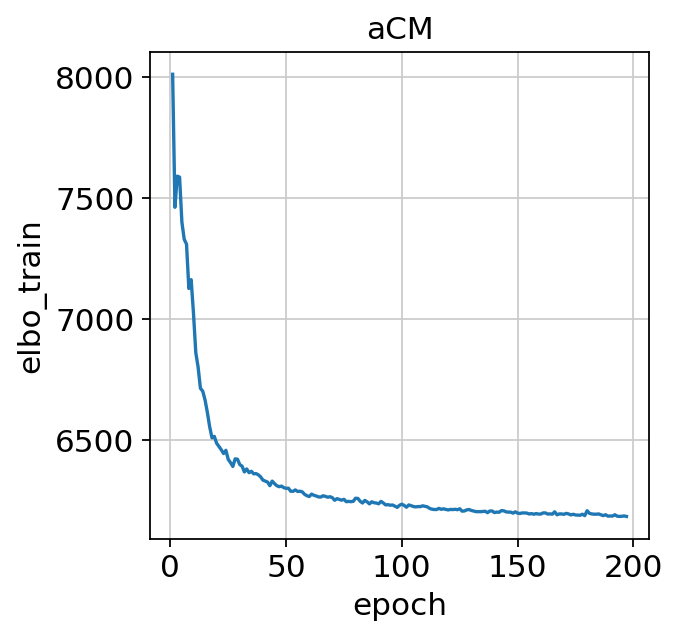

##### Myelo #####
(37439, 27138)
[1. 8. 1. 1. 1. 2. 1. 1. 2. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 37439 cells, 27138 vars, 27       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 37439 │
│             Vars             │ 27138 │
│            Labels            │   1   │
│           Batches            │  27   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │   D1_Cell_3prime-v2    │          2          │
│                        │  D1_Nuclei_3prime-v2   │          3          │
│                        │  D2_Nuclei_3prime-v2   │          4          │
│                        │   D3_Cell_3prime-v2    │          5          │
│                        │  D3_Nuclei_3prime-v2   │          6          │
│                        │ D3_Nuclei_Multiome-v1  │          7          │
│                        │   D4_Cell_3prime-v2    │          8          │
│                        │  D4_Nuclei_3prime-v2   │          9          │
│                        │   D5_Cell_3prime-v2    │         10          │
│                        │  D5_Nuclei_3prime-v2   │         11          │
│                        │   D6_Cell_3prime-v2    │         12          │
│                        │   D6_Cell_3prime-v3    │         13          │
│                        │  D6_Nuclei_3prime-v2   │         14          │
│                        │   D7_Cell_3prime-v2    │         15          │
│                        │  D7_Nuclei_3prime-v2   │         16          │
│                        │ D7_Nuclei_Multiome-v1  │         17          │
│                        │ D8_Nuclei_Multiome-v1  │         18          │
│                        │   D11_Cell_3prime-v3   │         19          │
│                        │  D11_Nuclei_3prime-v3  │         20          │
│                        │  H2_Nuclei_3prime-v3   │         21          │
│                        │  H3_Nuclei_3prime-v3   │         22          │
│                        │  H4_Nuclei_3prime-v3   │         23          │
│                        │  H5_Nuclei_3prime-v3   │         24          │
│                        │  H6_Nuclei_3prime-v3   │         25          │
│                        │  H7_Nuclei_3prime-v3   │         26          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 112812        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.993595123291015625 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.693302154541015625 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 214/214: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [15:50<00:00,  4.44s/it, loss=4.1e+03, v_num=1]


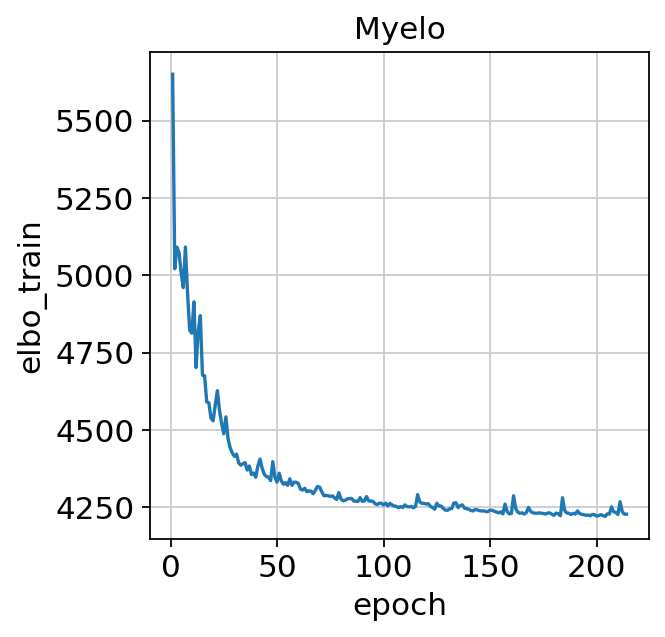

<Figure size 320x320 with 0 Axes>

In [6]:
for sub in ['aCM','Myelo']:
    print(f'##### {sub} #####')
    
    adata = sc.read_h5ad(f'/nfs/team205/heart/anndata_objects/8regions/scVI/subsets/{sub}_pp_allgene.h5ad')
    print(adata.shape)
    print(adata.X.data[:10])
    
    # setup anndata for scVI
    scvi.model.SCVI.setup_anndata(adata, 
                              # layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])
    scvi.data.view_anndata_setup(adata)
    
    # Creating and training a model
    # default parameter
    ################### changed here ###################
    vae = scvi.model.SCVI(adata, n_hidden=128, n_latent=10, n_layers=1, dispersion = 'gene-batch')
    ####################################################
    
    # train
    vae.train()
    
    # save scvi model
    vae.save(f'/nfs/team205/heart/anndata_objects/8regions/scVI/models/{sub}_allgene_def/')
    
    # Convergence plot
    x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
    plt.plot(x, vae.history['elbo_train'], label="train")
    plt.title(sub)
    plt.xlabel('epoch')
    plt.ylabel('elbo_train')
    plt.show()
    plt.clf()
    
    # add the latent space to adata
    adata.obsm["X_scVI"] = vae.get_latent_representation()
    
    # store the normalized expression values in the anndata
    adata.layers["scvi_normalized"] = vae.get_normalized_expression(library_size=10e4)
    
    # save post-scVI data
    adata.write(f'/nfs/team205/heart/anndata_objects/8regions/scVI/subsets/{sub}_post-scVI_def.h5ad')
    
    del adata, vae

## Larger batch size

##### aCM #####
(40543, 28086)
[  1. 116.  46. 151. 142. 304. 170. 237. 562. 102.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 40543 cells, 28086 vars, 25       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 40543 │
│             Vars             │ 28086 │
│            Labels            │   1   │
│           Batches            │  25   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │  D1_Nuclei_3prime-v2   │          2          │
│                        │  D2_Nuclei_3prime-v2   │          3          │
│                        │   D3_Cell_3prime-v2    │          4          │
│                        │  D3_Nuclei_3prime-v2   │          5          │
│                        │   D4_Cell_3prime-v2    │          6          │
│                        │  D4_Nuclei_3prime-v2   │          7          │
│                        │   D5_Cell_3prime-v2    │          8          │
│                        │  D5_Nuclei_3prime-v2   │          9          │
│                        │   D6_Cell_3prime-v2    │         10          │
│                        │   D6_Cell_3prime-v3    │         11          │
│                        │  D6_Nuclei_3prime-v2   │         12          │
│                        │   D7_Cell_3prime-v2    │         13          │
│                        │  D7_Nuclei_3prime-v2   │         14          │
│                        │ D7_Nuclei_Multiome-v1  │         15          │
│                        │ D8_Nuclei_Multiome-v1  │         16          │
│                        │   D11_Cell_3prime-v3   │         17          │
│                        │  D11_Nuclei_3prime-v3  │         18          │
│                        │  H2_Nuclei_3prime-v3   │         19          │
│                        │  H3_Nuclei_3prime-v3   │         20          │
│                        │  H4_Nuclei_3prime-v3   │         21          │
│                        │  H5_Nuclei_3prime-v3   │         22          │
│                        │  H6_Nuclei_3prime-v3   │         23          │
│                        │  H7_Nuclei_3prime-v3   │         24          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 169833        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.984140396118164062 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 14.23290252685546875  │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [11:12<00:00,  6.72s/it, loss=6.24e+03, v_num=1]


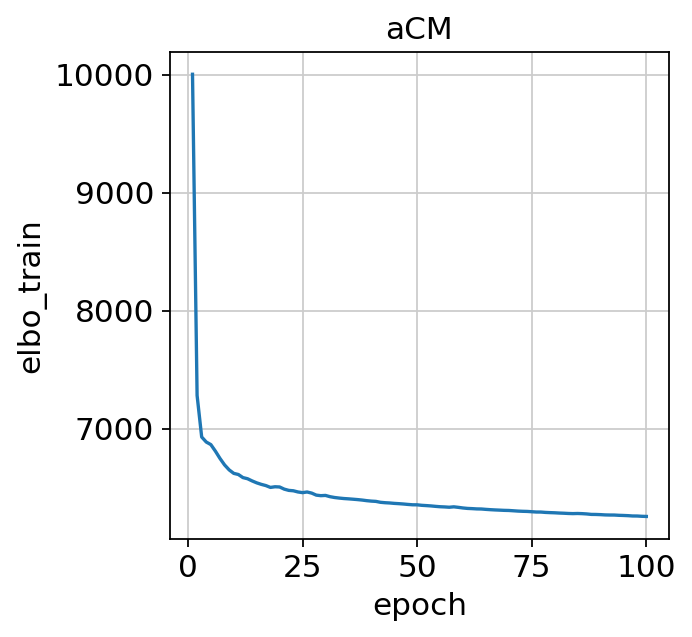

##### Myelo #####
(37439, 27138)
[1. 8. 1. 1. 1. 2. 1. 1. 2. 1.]
INFO     Using batches from adata.obs["batch_key"]                                           
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 37439 cells, 27138 vars, 27       
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 3 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/lustre/scratch117/cellgen/team205/kk18/miniconda3/envs/scvi_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function view_anndata_setup is deprecated; This method will be removed in 0.15.0. Please avoid building any new dependencies on it.
  warnings.warn(msg, category=FutureWarning)


Anndata setup with scvi-tools version 0.14.5.

              Data Summary              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃             Data             ┃ Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│            Cells             │ 37439 │
│             Vars             │ 27138 │
│            Labels            │   1   │
│           Batches            │  27   │
│           Proteins           │   0   │
│ Extra Categorical Covariates │   0   │
│ Extra Continuous Covariates  │   3   │
└──────────────────────────────┴───────┘

                   SCVI Data Registry                   
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Data      ┃         scvi-tools Location          ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       X       │               adata.X                │
│ batch_indices │       adata.obs['_scvi_batch']       │
│    labels     │      adata.obs['_scvi_labels']       │
│   cont_covs   │ adata.obsm['_scvi_extra_continuous'] │
└───────────────┴──────────────────────────────────────┘

                        Label Categories                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                            Batch Categories                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories       ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1 │          0          │
│                        │ AH1_Nuclei_Multiome-v1 │          1          │
│                        │   D1_Cell_3prime-v2    │          2          │
│                        │  D1_Nuclei_3prime-v2   │          3          │
│                        │  D2_Nuclei_3prime-v2   │          4          │
│                        │   D3_Cell_3prime-v2    │          5          │
│                        │  D3_Nuclei_3prime-v2   │          6          │
│                        │ D3_Nuclei_Multiome-v1  │          7          │
│                        │   D4_Cell_3prime-v2    │          8          │
│                        │  D4_Nuclei_3prime-v2   │          9          │
│                        │   D5_Cell_3prime-v2    │         10          │
│                        │  D5_Nuclei_3prime-v2   │         11          │
│                        │   D6_Cell_3prime-v2    │         12          │
│                        │   D6_Cell_3prime-v3    │         13          │
│                        │  D6_Nuclei_3prime-v2   │         14          │
│                        │   D7_Cell_3prime-v2    │         15          │
│                        │  D7_Nuclei_3prime-v2   │         16          │
│                        │ D7_Nuclei_Multiome-v1  │         17          │
│                        │ D8_Nuclei_Multiome-v1  │         18          │
│                        │   D11_Cell_3prime-v3   │         19          │
│                        │  D11_Nuclei_3prime-v3  │         20          │
│                        │  H2_Nuclei_3prime-v3   │         21          │
│                        │  H3_Nuclei_3prime-v3   │         22          │
│                        │  H4_Nuclei_3prime-v3   │         23          │
│                        │  H5_Nuclei_3prime-v3   │         24          │
│                        │  H6_Nuclei_3prime-v3   │         25          │
│                        │  H7_Nuclei_3prime-v3   │         26          │
└────────────────────────┴────────────────────────┴─────────────────────┘

                 Extra Continuous Variables                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Range            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │       500 -> 112812        │
│  adata.obs['pct_counts_mt']  │ 0 -> 19.993595123291015625 │
│ adata.obs['pct_counts_ribo'] │ 0 -> 19.693302154541015625 │
└──────────────────────────────┴────────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:09<00:00,  6.10s/it, loss=4.27e+03, v_num=1]


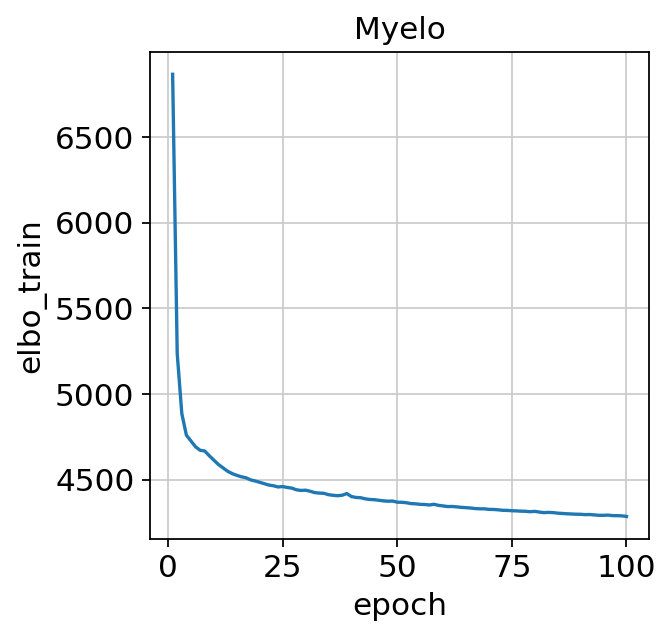

<Figure size 320x320 with 0 Axes>

In [7]:
for sub in ['aCM','Myelo']:
    print(f'##### {sub} #####')
    
    adata = sc.read_h5ad(f'/nfs/team205/heart/anndata_objects/8regions/scVI/subsets/{sub}_pp_allgene.h5ad')
    print(adata.shape)
    print(adata.X.data[:10])
    
    # setup anndata for scVI
    scvi.model.SCVI.setup_anndata(adata, 
                              # layer="counts", 
                              batch_key="batch_key",
                              continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])
    scvi.data.view_anndata_setup(adata)
    
    # Creating and training a model
    # default parameter
    vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
    
    # train
    ################### changed here ###################
    vae.train(batch_size=1024, max_epochs=100)
    ####################################################
    
    # save scvi model
    vae.save(f'/nfs/team205/heart/anndata_objects/8regions/scVI/models/{sub}_allgene_bs1024/')
    
    # Convergence plot
    x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
    plt.plot(x, vae.history['elbo_train'], label="train")
    plt.title(sub)
    plt.xlabel('epoch')
    plt.ylabel('elbo_train')
    plt.show()
    plt.clf()
    
    # add the latent space to adata
    adata.obsm["X_scVI"] = vae.get_latent_representation()
    
    # store the normalized expression values in the anndata
    adata.layers["scvi_normalized"] = vae.get_normalized_expression(library_size=10e4)
    
    # save post-scVI data
    adata.write(f'/nfs/team205/heart/anndata_objects/8regions/scVI/subsets/{sub}_post-scVI_bs1024.h5ad')
    
    del adata, vae